In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# below code for to engore the warnings
import warnings
warnings.filterwarnings('ignore')        

In [20]:
df = pd.read_csv(r"C:\Users\yetes\OneDrive\Desktop\Excel\IRIS.csv")

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
encoder = LabelEncoder()

In [24]:
df['species'] = encoder.fit_transform(df['species'])

In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [32]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,2
51,3.2,4.5,2
52,3.1,4.9,2
53,2.3,4.0,2
54,2.8,4.6,2


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

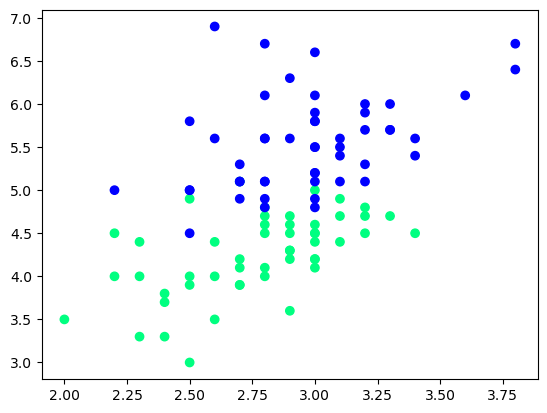

In [34]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [35]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_width,petal_length,species
57,2.4,3.3,2
70,3.2,4.8,2
78,2.9,4.5,2
62,2.2,4.0,2
50,3.2,4.7,2
68,2.2,4.5,2
98,2.5,3.0,2
81,2.4,3.7,2
64,2.9,3.6,2
51,3.2,4.5,2


In [36]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [37]:
df_train

,sepal_width,petal_length,species
79,2.6,3.5,2
74,2.9,4.3,2
104,3.0,5.8,1
124,3.3,5.7,1
110,3.2,5.1,1
123,2.7,4.9,1
140,3.1,5.6,1
89,2.5,4.0,2
67,2.7,4.1,2
107,2.9,6.3,1


In [38]:
df_val

,sepal_width,petal_length,species
142,2.7,5.1,1
80,2.4,3.8,2
61,3.0,4.2,2
100,3.3,6.0,1
126,2.8,4.8,1


In [39]:
df_test

,sepal_width,petal_length,species
73,2.8,4.7,2
70,3.2,4.8,2
133,2.8,5.1,1
141,3.1,5.1,1
64,2.9,3.6,2


In [40]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [41]:
y_test

array([1, 2, 2, 1, 1], dtype=int64)

# Case 1 - Bagging

In [42]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
123,2.7,4.9,1
123,2.7,4.9,1
67,2.7,4.1,2
140,3.1,5.6,1
89,2.5,4.0,2
124,3.3,5.7,1
110,3.2,5.1,1
67,2.7,4.1,2


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [44]:
dt_bag1 = DecisionTreeClassifier()

In [46]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

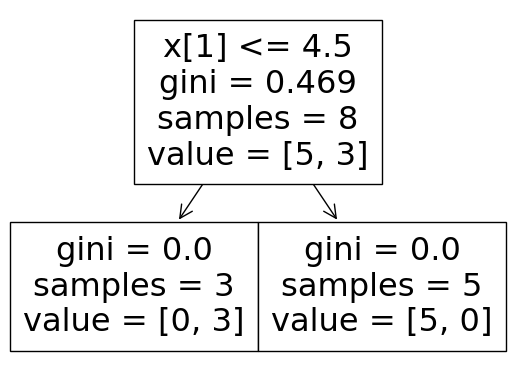

1.0


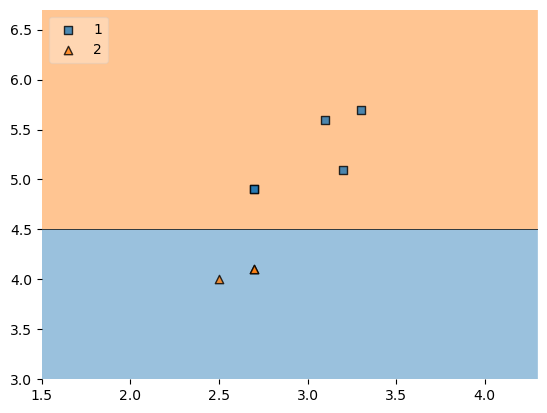

In [47]:
evaluate(dt_bag1,X,y)

In [48]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
107,2.9,6.3,1
123,2.7,4.9,1
110,3.2,5.1,1
124,3.3,5.7,1
110,3.2,5.1,1
110,3.2,5.1,1
89,2.5,4.0,2
107,2.9,6.3,1


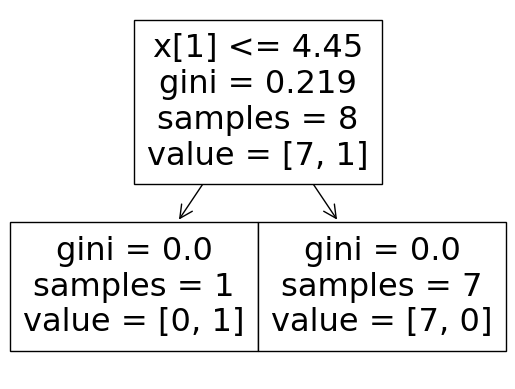

1.0


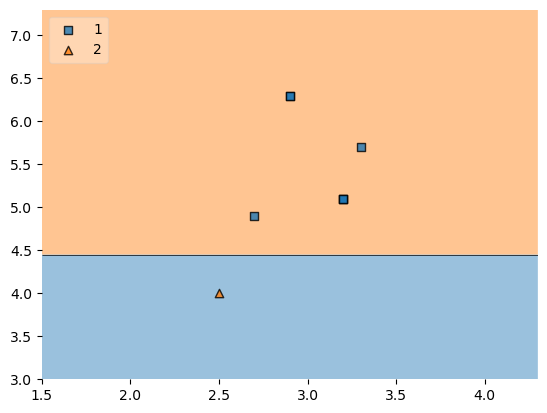

In [49]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [50]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
74,2.9,4.3,2
124,3.3,5.7,1
123,2.7,4.9,1
74,2.9,4.3,2
123,2.7,4.9,1
89,2.5,4.0,2
79,2.6,3.5,2
89,2.5,4.0,2


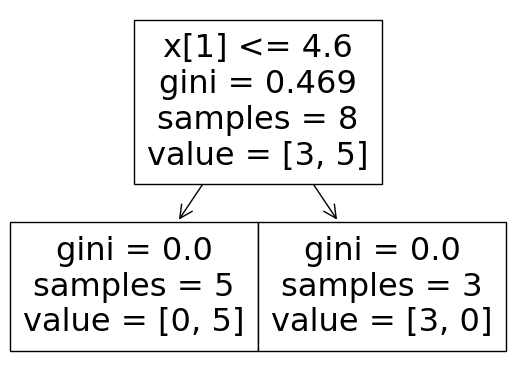

1.0


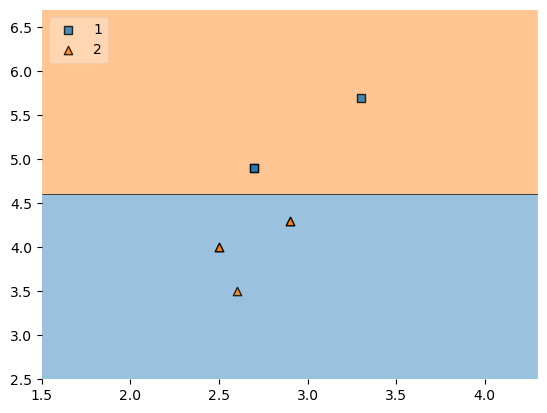

In [51]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [34]:
df_test

,SepalWidthCm,PetalLengthCm,Species
58,2.9,4.6,1
88,3.0,4.1,1
124,3.3,5.7,2
119,2.2,5.0,2
72,2.5,4.9,1


In [36]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [2]


# Pasting

In [55]:
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
79,2.6,3.5,2
74,2.9,4.3,2
104,3.0,5.8,1
124,3.3,5.7,1
110,3.2,5.1,1
123,2.7,4.9,1
140,3.1,5.6,1
89,2.5,4.0,2
67,2.7,4.1,2
107,2.9,6.3,1


In [56]:
df_train.sample(8)

,sepal_width,petal_length,species
67,2.7,4.1,2
124,3.3,5.7,1
79,2.6,3.5,2
74,2.9,4.3,2
110,3.2,5.1,1
140,3.1,5.6,1
89,2.5,4.0,2
104,3.0,5.8,1


# Random Subspaces

In [62]:
df1 = pd.read_csv(r"C:\Users\yetes\OneDrive\Desktop\Excel\IRIS.csv")
df1 = df1.sample(10)

In [67]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
143,6.8,3.2,5.9,2.3,2
13,4.3,3.0,1.1,0.1,1
120,6.9,3.2,5.7,2.3,2
51,6.4,3.2,4.5,1.5,3
0,5.1,3.5,1.4,0.2,1
28,5.2,3.4,1.4,0.2,1
75,6.6,3.0,4.4,1.4,3
57,4.9,2.4,3.3,1.0,3
25,5.0,3.0,1.6,0.2,1
32,5.2,4.1,1.5,0.1,1


In [68]:
df1.sample(2,replace=True,axis=1)

,species,sepal_length
143,2,6.8
13,1,4.3
120,2,6.9
51,3,6.4
0,1,5.1
28,1,5.2
75,3,6.6
57,3,4.9
25,1,5.0
32,1,5.2


# Random Patches

In [65]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
143,6.8,3.2,5.9,2.3,2
13,4.3,3.0,1.1,0.1,1
120,6.9,3.2,5.7,2.3,2
51,6.4,3.2,4.5,1.5,3
0,5.1,3.5,1.4,0.2,1
28,5.2,3.4,1.4,0.2,1
75,6.6,3.0,4.4,1.4,3
57,4.9,2.4,3.3,1.0,3
25,5.0,3.0,1.6,0.2,1
32,5.2,4.1,1.5,0.1,1


In [66]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,sepal_width,petal_width
28,3.4,0.2
120,3.2,2.3
0,3.5,0.2
57,2.4,1.0
120,3.2,2.3
75,3.0,1.4
51,3.2,1.5
143,3.2,2.3
